# Coronavirus Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
# Cumulative Data
cum_confirmed_data = pd.read_csv('time_series_19-covid-Confirmed.csv')
cum_deaths_data = pd.read_csv('time_series_19-covid-Deaths.csv')
cum_recovered_data = pd.read_csv('time_series_19-covid-recovered.csv')

world_cum_confirmed_cases = cum_confirmed_data.iloc[:, 4:].sum(axis=0)
world_cum_deaths_cases = cum_deaths_data.iloc[:, 4:].sum(axis=0)
world_cum_recovered_cases = cum_recovered_data.iloc[:, 4:].sum(axis=0)


# New Data
def cumulative_to_new(data):
    '''
    Convert cumulative data to new cases data.
    
    Parameters
    ----------
    data: DataFrame
        Cumulative data that needs to be converted to new cases data.
    
    Returns
    -------
    DataFrame of new cases data.
    '''
    new_data = data.copy()
    new_data.insert(4, '1/21/20', np.zeros(len(data), dtype=int))
    for i in np.arange(len(new_data['Country/Region'])):
        new_data.loc[i, 5:] = np.array(new_data.iloc[i, 5:]) - np.array(new_data.iloc[i, 4:-1])
    return new_data

new_confirmed_data = cumulative_to_new(cum_confirmed_data)
new_deaths_data = cumulative_to_new(cum_deaths_data)
new_recovered_data = cumulative_to_new(cum_recovered_data)
 
# Active Data
active_data = cum_confirmed_data.copy()
for i in np.arange(len(active_data['Country/Region'])):
    active_data.loc[i,4:] = cum_confirmed_data.iloc[i, 4:] - cum_deaths_data.iloc[i, 4:] - cum_recovered_data.iloc[i, 4:]


## Longitudinal analysis

### Worldwide

In [141]:
def worldwide_cum_cases(data, start_date='2020-01-22', end_date=None):
    '''
    Cumulative cases worldwide.
    
    Parameters
    ----------
    data: 2D array-like
        Data in DataFrame and their labels in String
        Example: [[data1, data1]['data1', 'data2']]
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    Graph
    '''
    if (not end_date):
        end_date = data[0][0].index[-1]
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cuminative Confirmed Cases Worldwide')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cuminative Cases')
    dates = pd.to_datetime(data[0][0].index)
    label = ['o-', '>-', 's-']
    color = ['tab:blue', 'tab:orange', 'tab:green']
    for i in np.arange(len(data[0])):
        plt.plot(dates[dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                 data[0][i][dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                 label[i], color=color[i], markersize=3, label=data[1][i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(pd.to_datetime(xmin), pd.to_datetime(xmax) + (pd.to_datetime(xmax) - pd.to_datetime(xmin)) * 0.02)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(fontsize='x-small')
    plt.grid(True, axis='y')

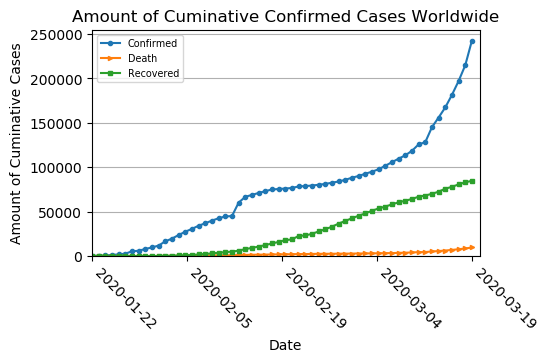

In [142]:
worldwide_cum_cases([[world_cum_confirmed_cases, world_cum_deaths_cases, world_cum_recovered_cases], 
                     ['Confirmed', 'Death', 'Recovered']])

### Country/Region

In [143]:
def countries_cases(data, countries, start_date='2020-01-22', end_date=None):
    '''
    Patient cases of countries/regions, such as cumulative and new confirmed ,deaths, and recovered, as well as active cases.
    
    Parameters
    ----------
    data: 2D array-like
        Data in DataFrame and their labels in String
        Example: [[data1, data1]['data1', 'data2']]
    
    countries: 1D array-like
        The countries to graph
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    Graph
    '''
    if (not end_date):
        end_date = data[0][0].iloc[0, 4:].index[-1]
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cases')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cases')
    label = ['o-', '>-', 's-']
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    for j in np.arange(len(countries)):
        for i in np.arange(len(data[0])):
            cum_data = data[0][i][data[0][i]['Country/Region'] == countries[j]].iloc[:, 4:].sum(axis=0)
            dates = pd.to_datetime(cum_data.index)
            plt.plot(dates[dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                     cum_data[dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                     label[i], color=color[j], markersize=3, label=countries[j] + ' ' + data[1][i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(pd.to_datetime(xmin), pd.to_datetime(xmax) + (pd.to_datetime(xmax) - pd.to_datetime(xmin)) * 0.05)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, axis='y')

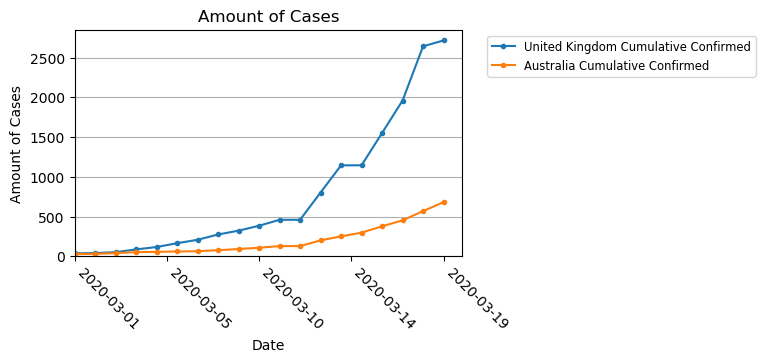

In [151]:
countries_cases([[cum_confirmed_data], 
                    ['Cumulative Confirmed']],
                   ['United Kingdom', 'Australia'], '2020/3/1')

### Province/State

In [146]:
#str(pd.datetime.now().date())
def provinces_cases(data, provinces, start_date='2020-01-22', end_date=None):
    '''
    Patient cases of provinces/states, such as cumulative and new confirmed ,deaths, and recovered, as well as active cases.
    
    Parameters
    ----------
    data: 2D array-like
        Data in DataFrame and their labels in String
        Example: [[data1, data1]['data1', 'data2']]
    
    provinces: 1D array-like
        The provinces to graph
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    Graph
    '''
    if (not end_date):
        end_date = data[0][0].iloc[0, 4:].index[-1]
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cases')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cases')
    label = ['o-', '>-', 's-']
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    for j in np.arange(len(provinces)):
        for i in np.arange(len(data[0])):
            cum_data = data[0][i][data[0][i]['Province/State'] == provinces[j]].iloc[:, 4:].sum(axis=0)
            dates = pd.to_datetime(cum_data.index)
            plt.plot(dates[dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                     cum_data[dates.get_loc(start_date):dates.get_loc(end_date)+1], 
                     label[i], color=color[j], markersize=3, label=provinces[j] + ' ' + data[1][i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(pd.to_datetime(xmin), pd.to_datetime(xmax) + (pd.to_datetime(xmax) - pd.to_datetime(xmin)) * 0.05)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, axis='y')

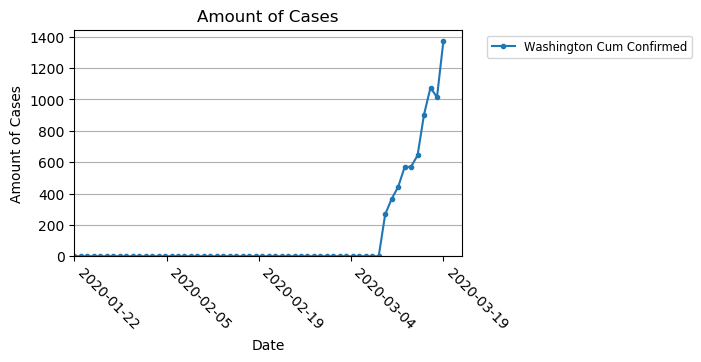

In [153]:
provinces_cases([[cum_confirmed_data], 
                ['Cum Confirmed']],
                ['Washington'])

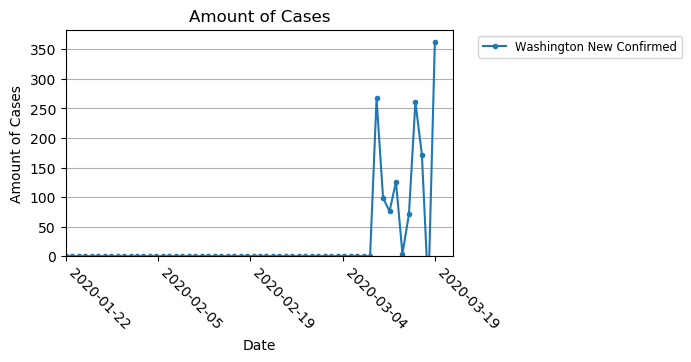

In [148]:
provinces_cases([[new_confirmed_data], 
                ['New Confirmed']],
                ['Washington'])

### Exponential fit

In [170]:
len(cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0))

58

In [239]:
cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0)[-1]

1/22/20        1
1/23/20        1
1/24/20        2
1/25/20        2
1/26/20        5
1/27/20        5
1/28/20        5
1/29/20        5
1/30/20        5
1/31/20        7
2/1/20         8
2/2/20         8
2/3/20        11
2/4/20        11
2/5/20        11
2/6/20        11
2/7/20        11
2/8/20        11
2/9/20        11
2/10/20       11
2/11/20       12
2/12/20       12
2/13/20       13
2/14/20       13
2/15/20       13
2/16/20       13
2/17/20       13
2/18/20       13
2/19/20       13
2/20/20       13
2/21/20       15
2/22/20       15
2/23/20       15
2/24/20       51
2/25/20       51
2/26/20       57
2/27/20       58
2/28/20       60
2/29/20       68
3/1/20        74
3/2/20        98
3/3/20       118
3/4/20       149
3/5/20       217
3/6/20       262
3/7/20       402
3/8/20       518
3/9/20       583
3/10/20      959
3/11/20     1281
3/12/20     1663
3/13/20     2179
3/14/20     2727
3/15/20     3499
3/16/20     4632
3/17/20     6421
3/18/20     7783
3/19/20    13677
dtype: int64

17741.299891298357


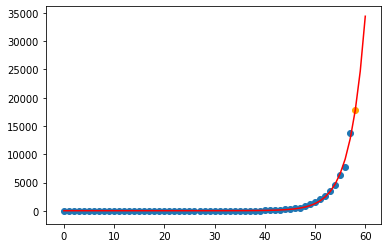

In [247]:
from scipy.optimize import curve_fit
def exp(x, offset, scale, stretch, delay):
    return scale * np.e ** (x / stretch - delay) + offset
x = np.arange(len(np.array(cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0))))
y = cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0)
params, cov = curve_fit(exp, x, y)
x_new = np.arange(61)
exp_fit = exp(x_new, *params)


i = 58
plt.plot(x_new, exp_fit, color='red')
plt.scatter(x, y)
plt.scatter(x_new[i], exp_fit[i], color='orange')
print(exp_fit[i])
#print(y[i])

18267.96479879101


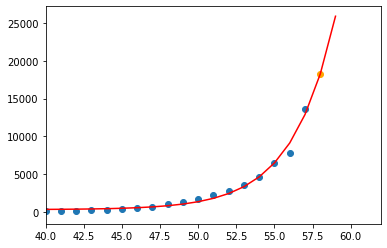

In [258]:
x = np.arange(len(np.array(cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0))))
y = cum_confirmed_data[cum_confirmed_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0)

j = 40
params, cov = curve_fit(exp, x[j:], y[j:])
x_new = np.arange(60)
exp_fit = exp(x_new, *params)


i = 58
plt.plot(x_new, exp_fit, color='red')
plt.scatter(x[j:], y[j:])
plt.scatter(x_new[i], exp_fit[i], color='orange')
plt.xlim(40)
print(exp_fit[i])
#print(y[i])



#plt.scatter(x[j:], y[j:])

## Cross-sectional analysis

In [149]:
pd.read_csv('newest-total.csv')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
271,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800
272,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
273,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
274,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560
